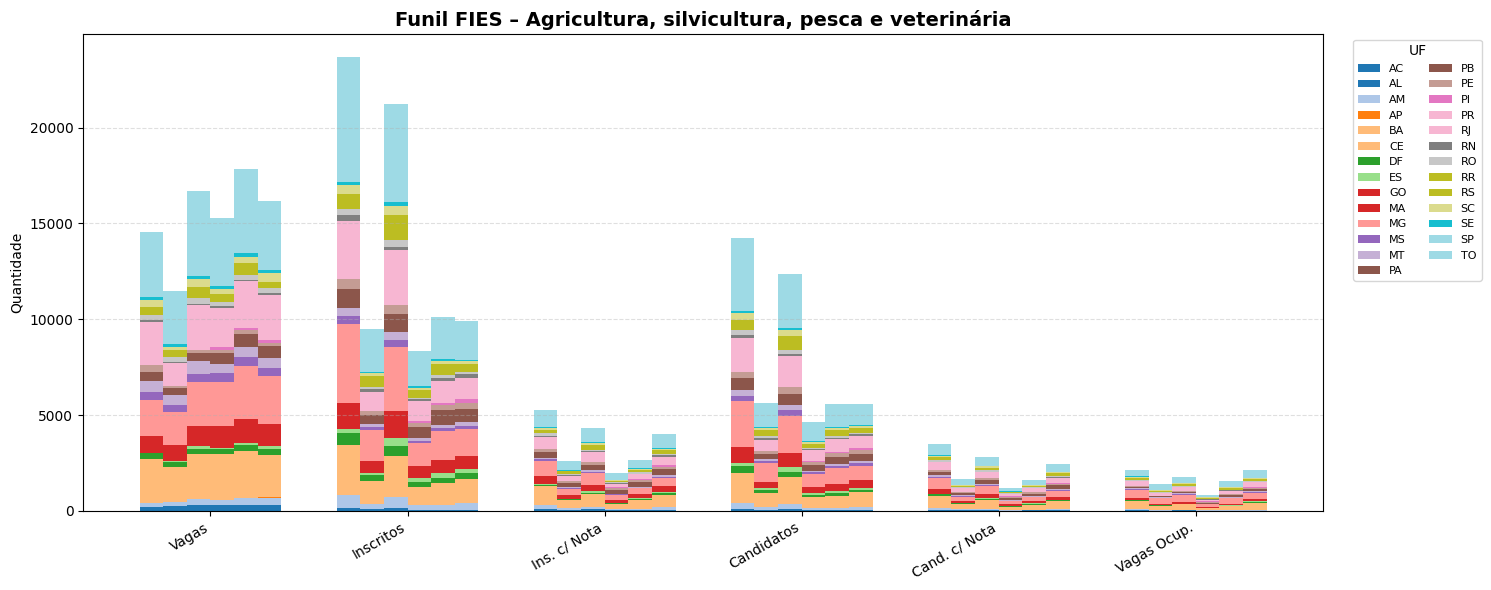

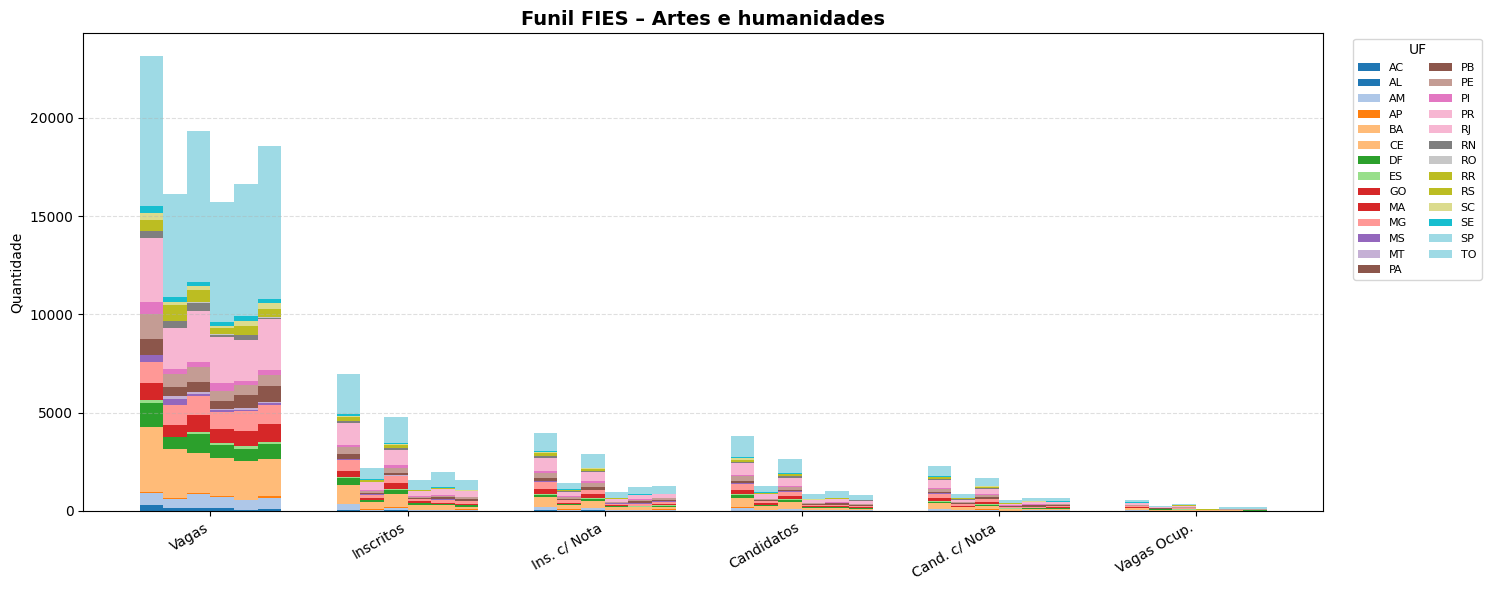

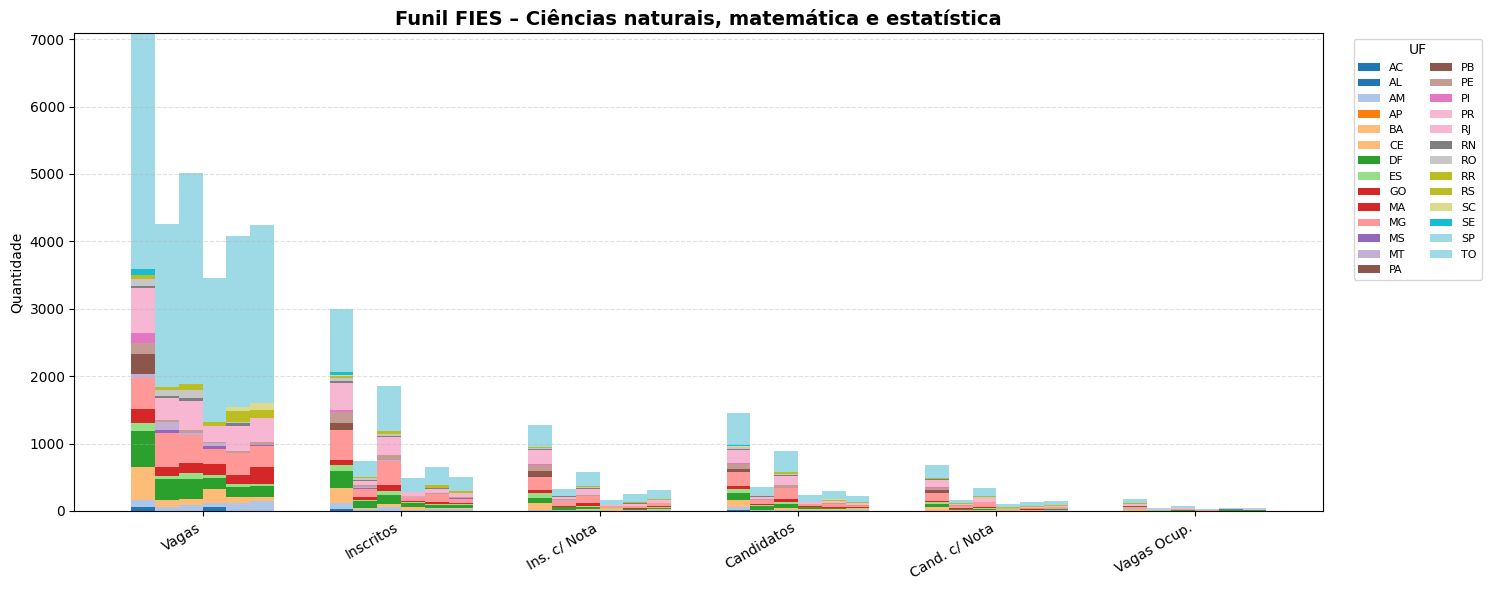

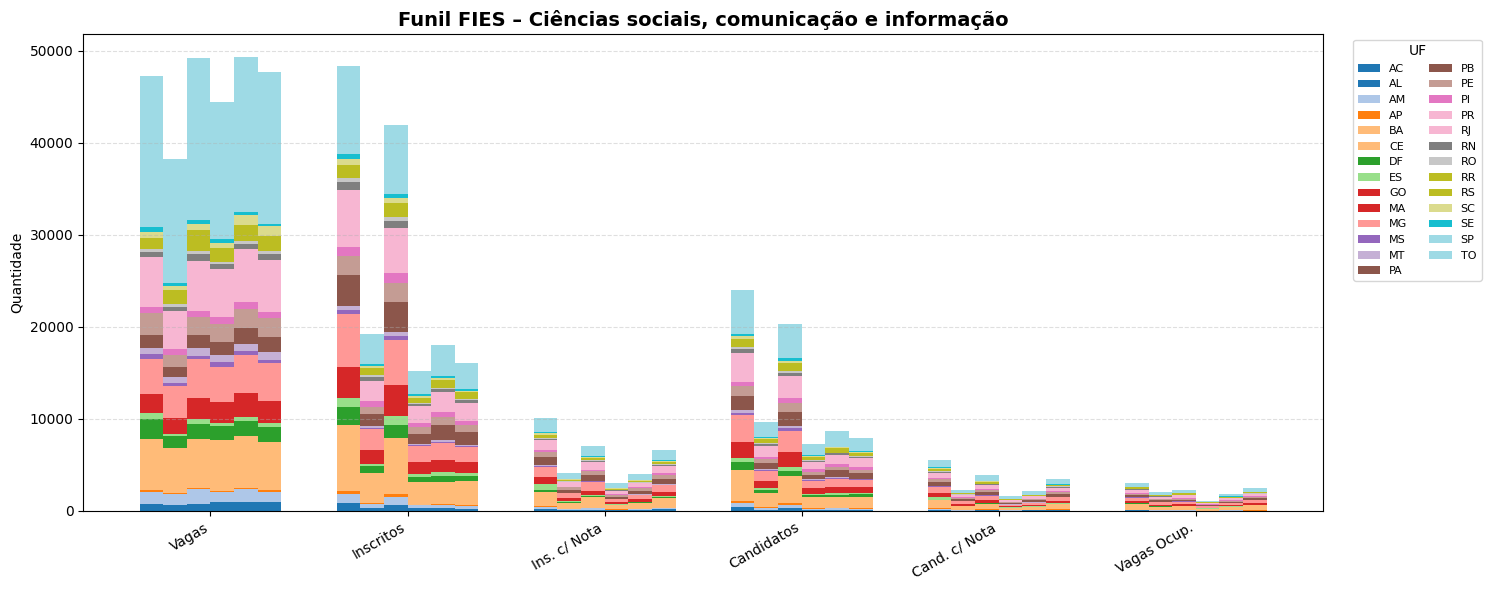

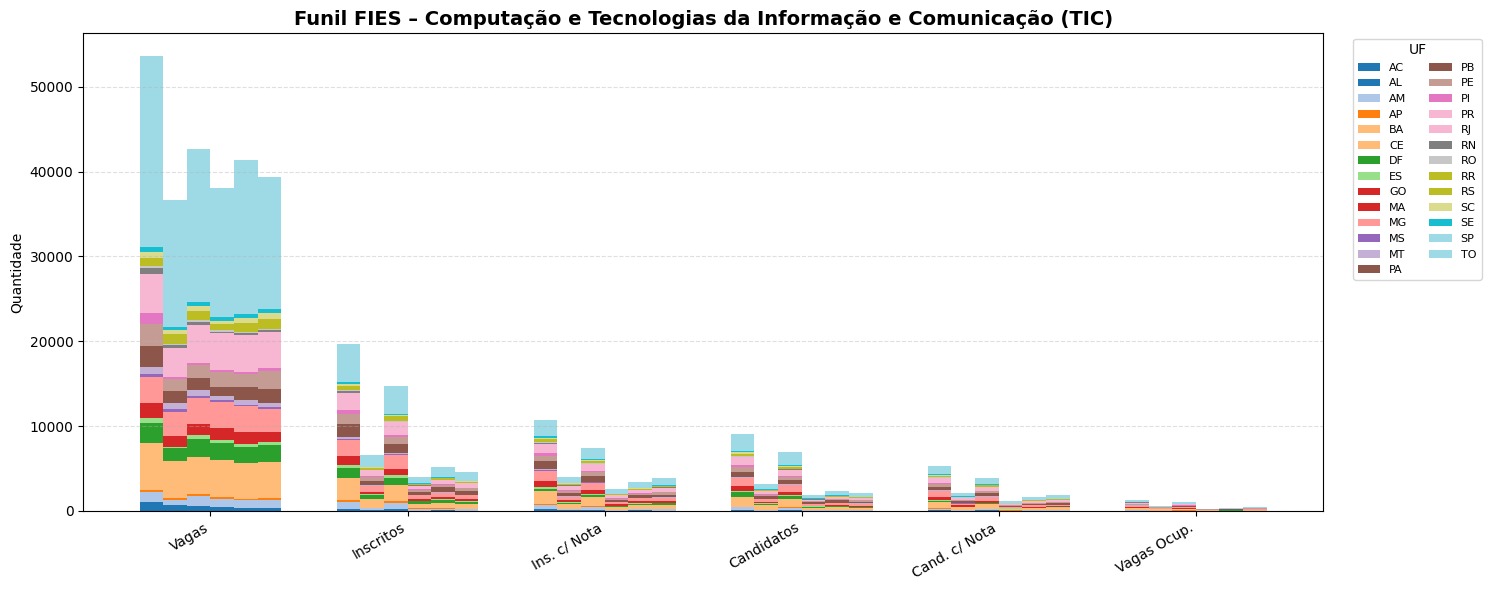

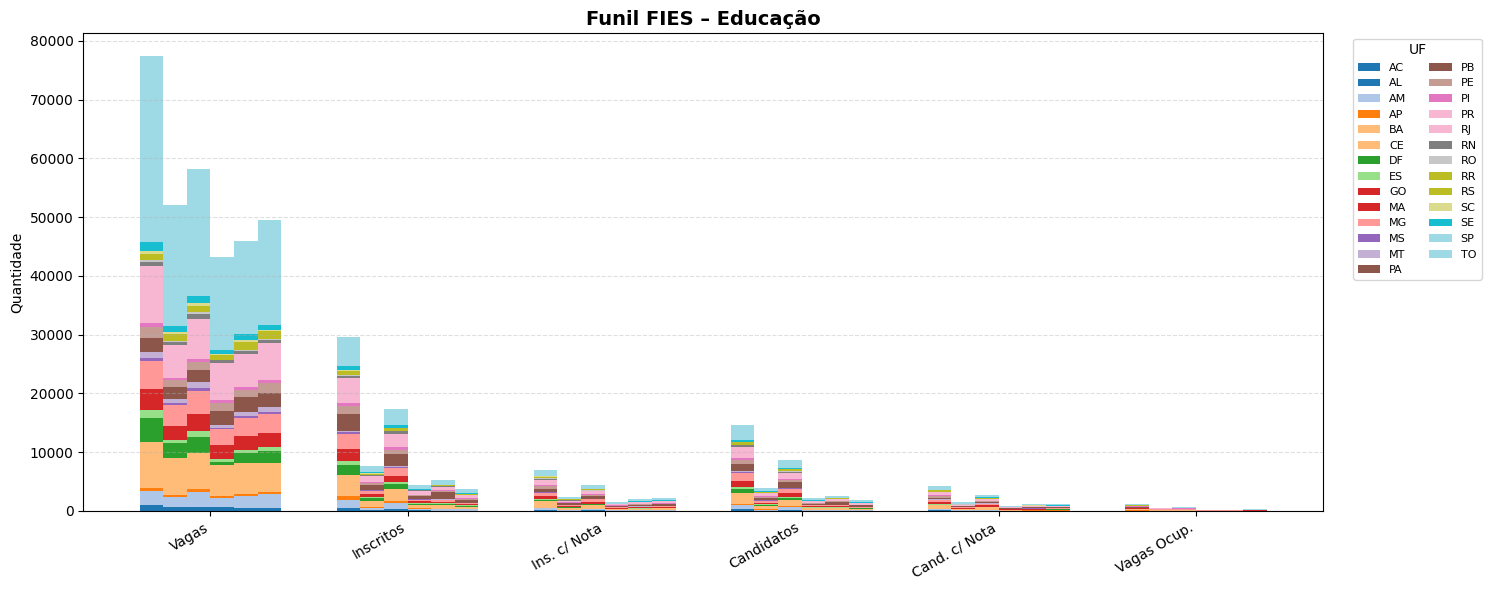

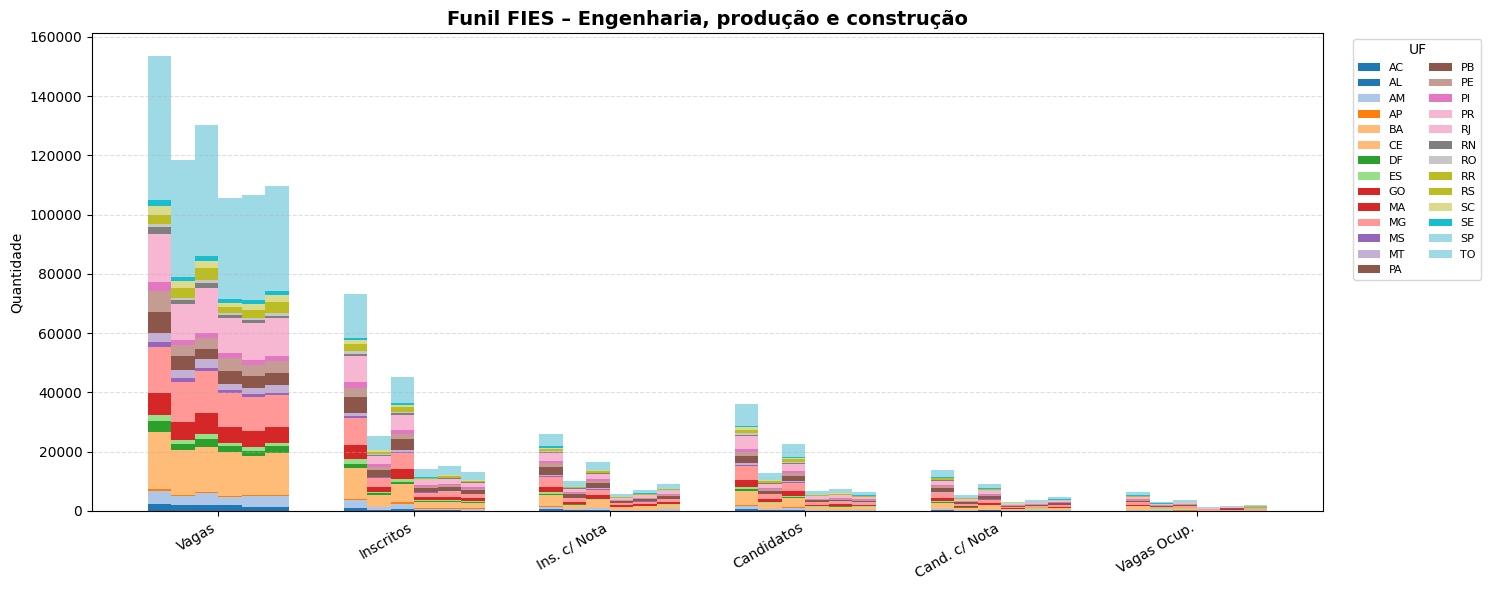

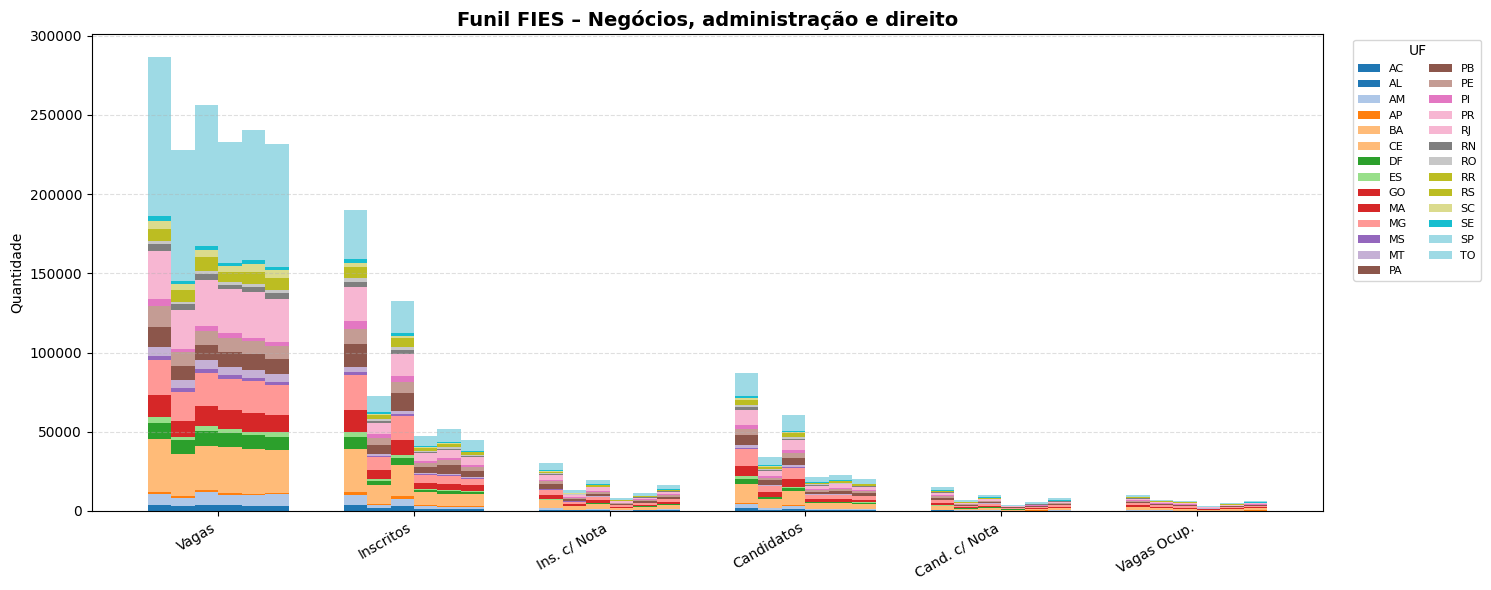

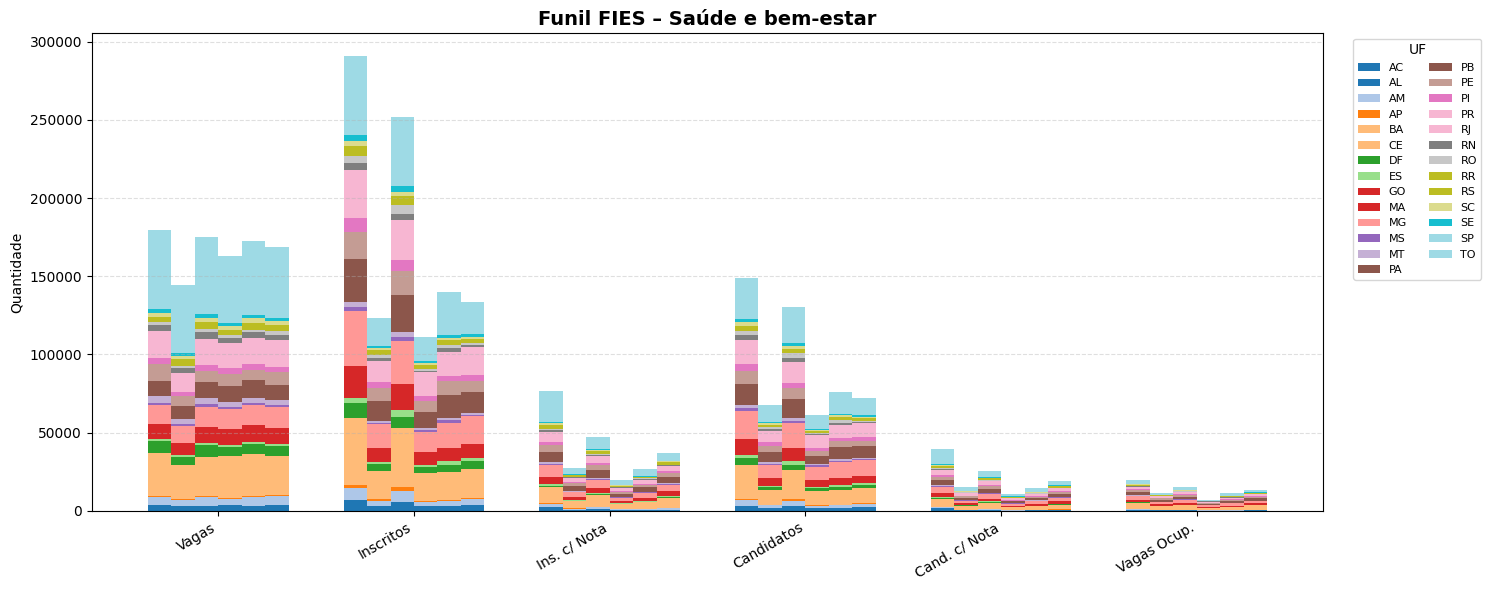

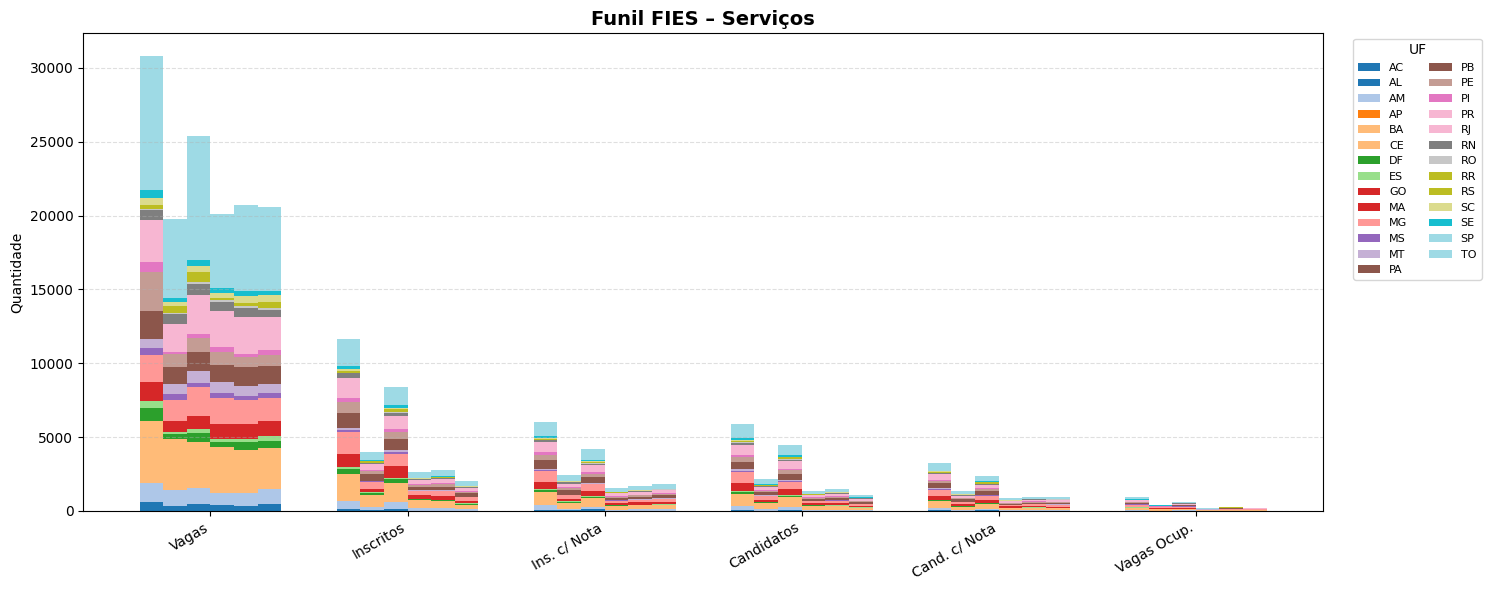

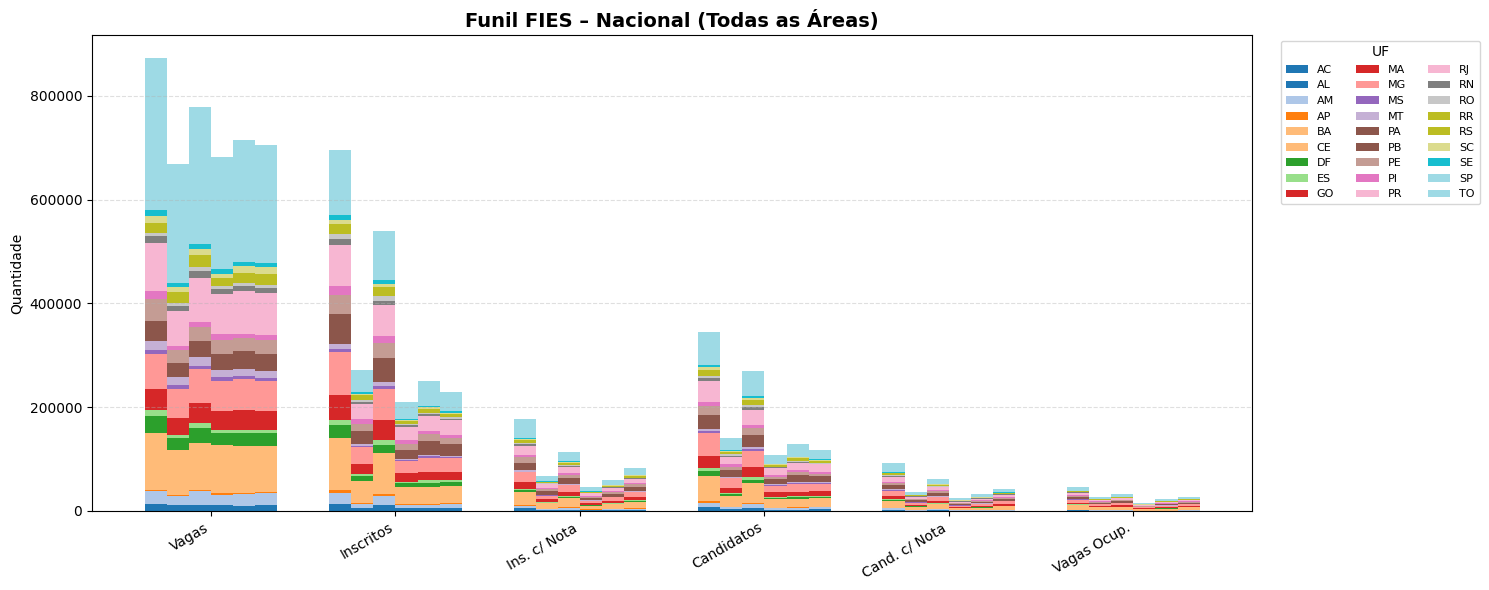

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Ler arquivo ---
path_funil_uf = '../../../planilhas/processado/modulo_3/funil_e_candidatos_unicos/funil_por_uf.csv'
df = pd.read_csv(path_funil_uf)

# --- 2. Criar coluna de período (ano + semestre) ---
df['periodo'] = df['ano'].astype(str) + '.' + df['semestre'].astype(str)

# --- 3. Definir colunas e nomes curtos ---
colunas_funil = [
    'vagas_fies',
    'Inscritos_Geral',
    'inscritos_com_nota_suficiente',
    'Candidatos_Unicos_Geral',
    'candidatos_unicos_com_nota_suficiente',
    'vagas_ocupadas'
]

nomes_curto = {
    'vagas_fies': 'Vagas',
    'Inscritos_Geral': 'Inscritos',
    'inscritos_com_nota_suficiente': 'Ins. c/ Nota',
    'Candidatos_Unicos_Geral': 'Candidatos',
    'candidatos_unicos_com_nota_suficiente': 'Cand. c/ Nota',
    'vagas_ocupadas': 'Vagas Ocup.'
}

# --- 4. Parâmetros básicos ---
areas = sorted(df['nome_cine_area_geral'].unique())
periodos = sorted(df['periodo'].unique())
ufs = sorted(df['uf_local_oferta'].unique())
largura_barra = 0.12
cores_ufs = plt.cm.tab20(np.linspace(0, 1, len(ufs)))  # paleta com muitas cores

# --- 5. Criar gráfico por área CINE ---
for area in areas:
    df_area = df[df['nome_cine_area_geral'] == area]

    # Agregar por período e UF (somando valores)
    df_area_grouped = (
        df_area.groupby(['periodo', 'uf_local_oferta'])[colunas_funil]
        .sum()
        .reset_index()
    )

    # Plot
    fig, ax = plt.subplots(figsize=(15, 6))
    x = np.arange(len(colunas_funil))
    deslocamentos = np.linspace(-largura_barra * 2.5, largura_barra * 2.5, len(periodos))

    for desloc, periodo in zip(deslocamentos, periodos):
        df_periodo = df_area_grouped[df_area_grouped['periodo'] == periodo]
        base = np.zeros(len(colunas_funil))

        for cor, uf in zip(cores_ufs, ufs):
            valores = df_periodo[df_periodo['uf_local_oferta'] == uf][colunas_funil]
            if valores.empty:
                valores = [0]*len(colunas_funil)
            else:
                valores = valores.values[0]

            ax.bar(x + desloc, valores, width=largura_barra, bottom=base, color=cor, label=uf if periodo == periodos[0] else "")
            base += valores

    ax.set_xticks(x)
    ax.set_xticklabels([nomes_curto[c] for c in colunas_funil], rotation=30, ha='right')
    ax.set_ylabel('Quantidade')
    ax.set_title(f'Funil FIES – {area}', fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.legend(title='UF', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, fontsize=8)

    plt.tight_layout()
    plt.show()

# --- 6. Gráfico Nacional (todas as áreas somadas) ---
df_total = df.groupby(['periodo', 'uf_local_oferta'])[colunas_funil].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
x = np.arange(len(colunas_funil))
deslocamentos = np.linspace(-largura_barra * 2.5, largura_barra * 2.5, len(periodos))

for desloc, periodo in zip(deslocamentos, periodos):
    df_periodo = df_total[df_total['periodo'] == periodo]
    base = np.zeros(len(colunas_funil))

    for cor, uf in zip(cores_ufs, ufs):
        valores = df_periodo[df_periodo['uf_local_oferta'] == uf][colunas_funil]
        if valores.empty:
            valores = [0]*len(colunas_funil)
        else:
            valores = valores.values[0]

        ax.bar(x + desloc, valores, width=largura_barra, bottom=base, color=cor, label=uf if periodo == periodos[0] else "")
        base += valores

ax.set_xticks(x)
ax.set_xticklabels([nomes_curto[c] for c in colunas_funil], rotation=30, ha='right')
ax.set_ylabel('Quantidade')
ax.set_title('Funil FIES – Nacional (Todas as Áreas)', fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='UF', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=3, fontsize=8)

plt.tight_layout()
plt.show()